# Input Loading

In [1]:
import pandas as pd

print('loading train...', flush=True, end='')

# x를 loading해서 (batch_size, step, channel)
input_path = '../DL_model/dataset/preprocess4/input2/'
x_train = np.load(input_path+'x_train.npz', allow_pickle=True)['arr_0']
x_test = np.load(input_path+'x_test.npz', allow_pickle=True)['arr_0']
x_val = np.load(input_path+'x_val.npz', allow_pickle=True)['arr_0']

gender_train = np.load(input_path+'gender_train.npz', allow_pickle=True)['arr_0']
gender_test = np.load(input_path+'gender_test.npz', allow_pickle=True)['arr_0']
gender_val = np.load(input_path+'gender_val.npz', allow_pickle=True)['arr_0']

age_train = np.load(input_path+'age_train.npz', allow_pickle=True)['arr_0']
age_test = np.load(input_path+'age_test.npz', allow_pickle=True)['arr_0']
age_val = np.load(input_path+'age_val.npz', allow_pickle=True)['arr_0']

y_train = np.load(input_path+'y_train.npz')['arr_0']
y_test = np.load(input_path+'y_test.npz')['arr_0']
y_val = np.load(input_path+'y_val.npz')['arr_0']
print('done', flush=True)

print('x_train shape:', x_train.shape)
print('x_test.shape:', x_test.shape)
print('x_val.shape:', x_val.shape)

# binary classification
y_train_bin = y_train >= 4
y_test_bin = y_test >= 4
y_val_bin = y_val >= 4

loading train...done
x_train shape: (74636, 5000, 2)
x_test.shape: (8795, 5000, 2)
x_val.shape: (7955, 5000, 2)


## Sample weight

### 2 class

In [ ]:
# 2 class에 대한 sample weight
train_w_samp2 = np.ones(shape=(len(y_train),))
train_w_samp2[y_train_bin==0]= len(y_train) / np.sum(y_train_bin)
train_w_samp2[y_train_bin!=0]= len(y_train) / np.sum(~y_train_bin)


print('train set')
print('sample weight for no pain: {:.2f}, moderate pain: {:.2f}'
      .format(len(y_train) / np.sum(y_train_bin), len(y_train) / np.sum(~y_train_bin)))


# 2 class에 대한 sample weight
val_w_samp2 = np.ones(shape=(len(y_val),))
val_w_samp2[y_val_bin==0]= len(y_val) / np.sum(y_val_bin)
val_w_samp2[y_val_bin!=0]= len(y_val) / np.sum(~y_val_bin)

print('val set')
print('sample weight for no pain: {:.2f}, moderate pain: {:.2f}'
      .format(len(y_val) / np.sum(y_val_bin), len(y_val) / np.sum(~y_val_bin)))

# 2 class에 대한 sample weight
test_w_samp2 = np.ones(shape=(len(y_test),))
test_w_samp2[y_test_bin==0]= len(y_test) / np.sum(y_test_bin)
test_w_samp2[y_test_bin!=0]= len(y_test) / np.sum(~y_test_bin)

print('test set')
print('sample weight for no pain: {:.2f}, moderate pain: {:.2f}'
      .format(len(y_test) / np.sum(y_test_bin), len(y_test) / np.sum(~y_test_bin)))

### 3 class

In [2]:
# 3 class에 대한 sample weight
train_w_samp3 = np.ones(shape=(len(y_train),))

train_w_samp3[y_train<4]= len(y_train)/np.sum(y_train<4)
train_w_samp3[(y_train>=4)&(y_train<7)]= len(y_train)/np.sum((4<=y_train)&(y_train<7))
train_w_samp3[y_train>=7]= len(y_train)/np.sum(y_train>=7)

print('train set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}\n'
      .format(len(y_train)/np.sum(y_train<4),len(y_train)/np.sum((y_train>=4)&(y_train<7)),len(y_train)/np.sum(y_train>=7)))

# 3 class에 대한 sample weight
val_w_samp3 = np.ones(shape=(len(y_val),))

val_w_samp3[y_val<4]= len(y_val)/np.sum(y_val<4)
val_w_samp3[(y_val>=4)&(y_val<7)]= len(y_val)/np.sum((4<=y_val)&(y_val<7))
val_w_samp3[y_val>=7]= len(y_val)/np.sum(y_val>=7)

print('val set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}\n'
      .format(len(y_val)/np.sum(y_val<4),len(y_val)/np.sum((y_val>=4)&(y_val<7)),len(y_val)/np.sum(y_val>=7)))

# 3 class에 대한 sample weight
test_w_samp3 = np.ones(shape=(len(y_test),))

test_w_samp3[y_test<4]= len(y_test)/np.sum(y_test<4)
test_w_samp3[(y_test>=4)&(y_test<7)]= len(y_test)/np.sum((4<=y_test)&(y_test<7))
test_w_samp3[y_test>=7]= len(y_test)/np.sum(y_test>=7)

print('test set')
print('sample weight for class 1: {:.2f}, class 2: {:.2f}, class 3: {:.2f}'
      .format(len(y_test)/np.sum(y_test<4),len(y_test)/np.sum((y_test>=4)&(y_test<7)),len(y_test)/np.sum(y_test>=7)))

train set
sample weight for class 1: 2.84, class 2: 2.07, class 3: 6.08

val set
sample weight for class 1: 2.69, class 2: 2.09, class 3: 6.63

test set
sample weight for class 1: 2.62, class 2: 2.17, class 3: 6.36


# GPU setting

In [3]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

4 Physical GPUs, 4 Logical GPUs


# Training

In [4]:
# input, sample weight settings
train_w_samp = train_w_samp3
val_w_samp = val_w_samp3
test_w_samp = test_w_samp3

agender_train = np.array([[age_train[i], gender_train[i]] for i in range(len(age_train))])
agender_val = np.array([[age_val[i], gender_val[i]] for i in range(len(age_val))])
agender_test = np.array([[age_test[i], gender_test[i]] for i in range(len(age_test))])

x_trains = [x_train, agender_train]
x_vals = [x_val, agender_val]
x_tests = [x_test, agender_test]

In [7]:
from keras.models import Sequential
from keras.models import Model, load_model
from keras.optimizers import Adam as Adam
from keras.layers import Dense, Conv1D, MaxPooling1D, GlobalMaxPool1D, BatchNormalization, Dropout, Activation
from keras.layers import GlobalAveragePooling1D, Flatten, SeparableConv1D, LeakyReLU
from keras.layers import Input, concatenate
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
import tensorflow as tf
import os, pickle
from keras import backend as K
from keras import regularizers
from keras.initializers import he_normal, GlorotNormal
import tensorflow_addons as tfa

# hyperparamters
num_nodes = [256,256,128] #, 64, 64, 64]
kernel_size = 3
kernels = [3,3,3]
pool_size = 2
BATCH_SIZE = 512
dense_node = 16
dense_node2 = 0
dropout_cnn = 0.4
dropout_fc = 0.1
dropout_fc2 = 0
learning_rate = 0.001


# initializer & regularizer
k_init = he_normal(seed=None)
#k_init = GlorotNormal(seed=None) # Xavier normal initializer
#k_init = None
b_init = None
k_l2 = 0
#k_reg = regularizers.l2(l2=k_l2)
k_reg = None
b_reg = None


testname = '-'.join([str(num_node) for num_node in num_nodes])
print(testname)


# 출력 폴더를 생성
model_name = '1D_CNN_ECG+PPG_bin_sampleweight_3class_agender-sigmoid_'
for num_node in num_nodes:
    model_name += 'conv{}_'.format(num_node)
for kernel in kernels:
    model_name += 'filter{}x2_'.format(kernel)
model_name += 'bn_maxpool{}_globalaverage_pool_dropout{}_dense{}_dropout{}_dense{}_dropout{}_batch{}_lr_{}_kinit'.format(pool_size, dropout_cnn, dense_node, dropout_fc, dense_node2, dropout_fc2, BATCH_SIZE, learning_rate)

#model_name = 'model_reg_{}_{}_{}_size{}_relu_bn_maxpool{}_globalmaxpool_dense32_dropout{}_batch{}_learning_rate{}'.format(num_nodes[0], num_nodes[1], num_nodes[2], kernel_size, pool_size, dropout_rate, BATCH_SIZE, learning_rate)
save_path = "output/preprocess4/input2+age+gender/"+model_name

if not os.path.exists(save_path):
    os.mkdir(save_path)
weight_path = save_path + "/weights.hdf5"


# GPU 설정
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:2","/gpu:3"])
with strategy.scope():
    
    # build a model
    inp_fnn = Input(shape=(agender_train.shape[1],))
    inp_cnn = Input(shape=(x_train.shape[1], x_train.shape[2]))
    
    out_fnn = inp_fnn
    out_fnn = Activation('sigmoid') (out_fnn)
    
    out_cnn = inp_cnn
    for idx, num_node in enumerate(num_nodes):
        out_cnn = Conv1D(filters=num_node, kernel_size=kernels[idx], padding='same', kernel_initializer=k_init) (out_cnn)
        out_cnn = Conv1D(filters=num_node, kernel_size=kernels[idx], padding='same', kernel_initializer=k_init) (out_cnn)
        out_cnn = Activation('relu') (out_cnn)  # out_cnn = LeakyReLU(alpha=0.1) (out_cnn)
        out_cnn = BatchNormalization() (out_cnn)
        out_cnn = MaxPooling1D(pool_size=pool_size) (out_cnn)
        
    #out_cnn = GlobalMaxPool1D() (out_cnn)
    out_cnn = GlobalAveragePooling1D() (out_cnn)
    out_cnn = Dropout(dropout_cnn) (out_cnn)
    
    out = concatenate([out_fnn, out_cnn])
    
    if dense_node != 0:
        out = Dense(dense_node, kernel_initializer=k_init, activation='tanh') (out) # age값이 너무 확튀면 sigmoid?
        out = Dropout(dropout_fc) (out)
        
    if dense_node2 !=0:
        out = Dense(dense_node2, kernel_initializer=k_init, activation='tanh') (out) # age값이 너무 확튀면 sigmoid?
        out = Dropout(dropout_fc2) (out)
        
    out = Dense(1, activation='sigmoid') (out)
    
    model = Model(inputs=[inp_cnn, inp_fnn], outputs=[out])
    
    print(model.summary())
    
    # model 학습 설정
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=learning_rate), metrics=["acc", tf.keras.metrics.AUC()])
    hist = model.fit(x_trains, y_train_bin, validation_data = (x_vals, y_val_bin, val_w_samp), sample_weight=train_w_samp, epochs=100, batch_size=BATCH_SIZE, #class_weight={0:1, 1:3}, 
                            callbacks=[ModelCheckpoint(monitor='val_loss', filepath=weight_path, verbose=1, save_best_only=True),
                                        EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')])

    #tf.keras.backend.clear_session()
    model.load_weights(weight_path)

    # 모델의 아키텍처 및 구조 저장
    open(save_path + "/model.json", "wt").write(model.to_json())


    # 전체 test 샘플을 한번에 예측
    y_pred = model.predict(x_tests).flatten() # binary는 flatten

# 결과를 저장
#np.savetxt(save_path+'/pred_y.txt', y_pred)


# 모델의 history log 저장 - binary classification
for key in hist.history.keys():
    if 'auc' in key and not 'val' in key:
        auc_key = key
#pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['accuracy'], hist.history['val_accuracy'], hist.history[auc], hist.history['val_'+auc]), open(save_path+'/history', 'wb'))

# 모델의 history log 저장 - regression
pickle.dump((hist.history['loss'], hist.history['val_loss'], hist.history['acc'], hist.history['val_acc'], hist.history[auc_key], hist.history['val_'+auc_key]), open(save_path+'/history', 'wb'))


256-256-128
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3')
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 5000, 2)]    0                                            
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 5000, 256)    1792        input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 5000, 256)    196864      conv1d_6[0][0]                   
__________________________________________________________________________________________________
activation_5 (Activation)

146/146 [==============================] - ETA: 0s - loss: 1.4229 - acc: 0.7869 - auc_1: 0.7505
Epoch 00006: val_loss improved from 1.49238 to 1.44951, saving model to output/preprocess4/input2+age+gender/1D_CNN_ECG+PPG_bin_sampleweight_3class_agender-sigmoid_conv256_conv256_conv128_filter3x2_filter3x2_filter3x2_bn_maxpool2_globalaverage_pool_dropout0.4_dense16_dropout0.1_dense0_dropout0_batch512_lr_0.001_kinit/weights.hdf5
146/146 [==============================] - 61s 415ms/step - loss: 1.4229 - acc: 0.7869 - auc_1: 0.7505 - val_loss: 1.4495 - val_acc: 0.7751 - val_auc_1: 0.7357
Epoch 7/100
146/146 [==============================] - ETA: 0s - loss: 1.3972 - acc: 0.7898 - auc_1: 0.7596
Epoch 00007: val_loss did not improve from 1.44951
146/146 [==============================] - 60s 414ms/step - loss: 1.3972 - acc: 0.7898 - auc_1: 0.7596 - val_loss: 1.5121 - val_acc: 0.7625 - val_auc_1: 0.7517
Epoch 8/100
146/146 [==============================] - ETA: 0s - loss: 1.3823 - acc: 0.7921 -

In [ ]:
 pickle.load(open(vital_path+'/'+row['file_path'], 'rb'))

# Evaluation

test set accuracy:0.78
test set AUROC: 0.7339845540628492
test set AUPRC: 0.819583987499684


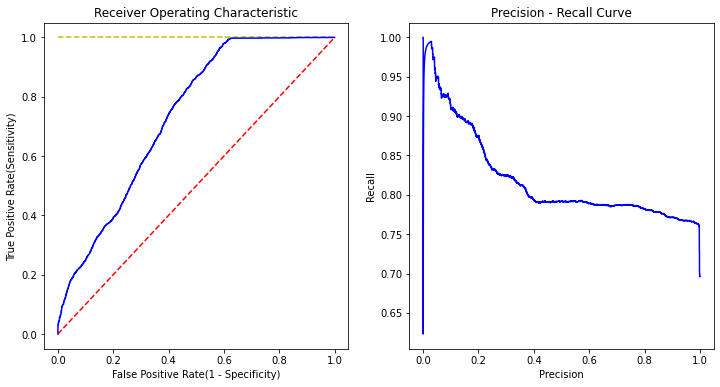

In [8]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from numpy import interp
from keras import losses, metrics
import keras.backend as K
import matplotlib.pyplot as plt

### Classification
# Model Accuracy of test set
#model_y = y_pred>=0.5
#acc_val = np.mean(model_y==y_test_bin)
acc = metrics.Accuracy()
acc.update_state(y_pred>=0.5, y_test_bin, sample_weight=test_w_samp)
acc_val = acc.result().numpy()
print('test set accuracy:{:.2f}'.format(acc_val))


# moderate pain
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test_bin, y_pred, sample_weight = test_w_samp)
precision, recall, _ = precision_recall_curve(y_test_bin, y_pred, sample_weight = test_w_samp)
roc_auc = auc(false_positive_rate, true_positive_rate)
prc_auc = auc(recall, precision)
print('test set AUROC:', roc_auc)
print('test set AUPRC:', prc_auc)


# Adding evaluation results to file name
test_path = 'output/preprocess4/input2+age+gender/auroc{:.4f}_auprc{:.4f}_{}acc{:.2f}'.format(roc_auc,prc_auc,model_name,acc_val)
os.rename(save_path, test_path)

# Plotting ROC, PRC
fig = plt.figure(figsize=(12,6))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.plot(false_positive_rate, true_positive_rate, 'b', label='moderate pain (AUC = %0.4f)'% roc_auc)

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - Recall Curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall, precision, 'b', label='moderate pain (AUC = %0.4f)'% prc_auc)

plt.savefig(test_path + '/roc_prc.png', bbox_inches="tight", pad_inches=0.5)

model: 1D_CNN_ECG+PPG_bin_sampleweight_3class_agender-sigmoid_conv64_conv128_filter7_filter5_bn_maxpool2_globalmaxpool_dropout0_dense16_dropout0.5_dense0_dropout0.2_batch512_lr_0.001_kinit


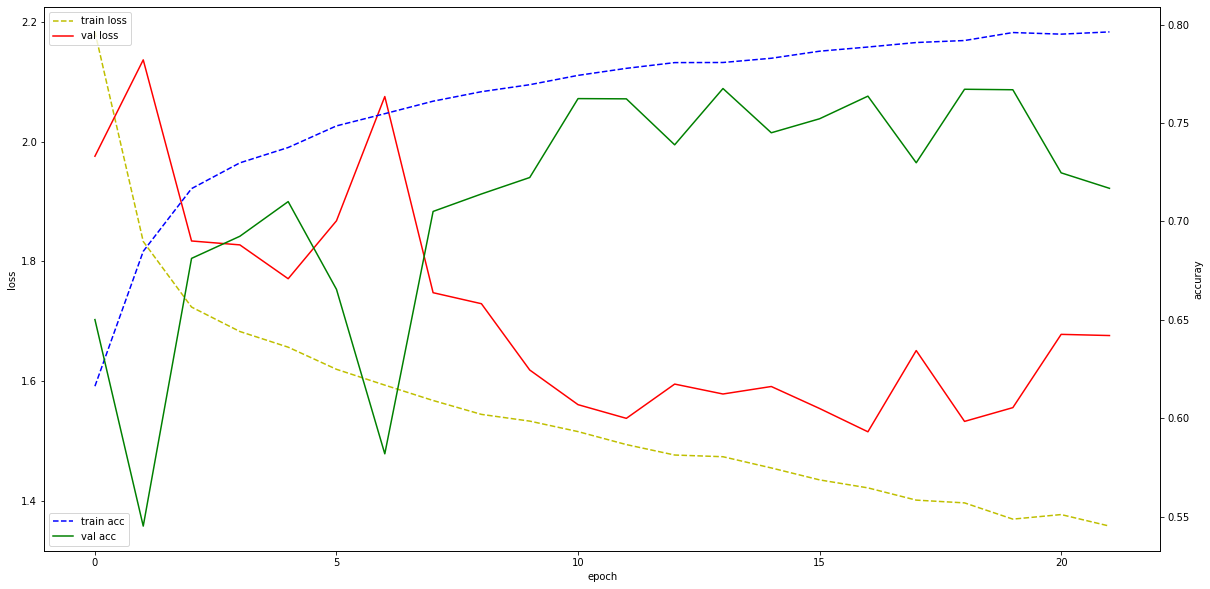

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt


print('model:', model_name)


fig, loss_ax = plt.subplots(figsize=(20,10))

#x-axis는 공유하지만 y-axis는 공유x
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', linestyle='dashed', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

#acc_ax.plot(hist.history['mean_absolute_error'], 'b', linestyle='dashed',label='train mae')
#acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val mae')
acc_ax.plot(hist.history['acc'], 'b', linestyle='dashed',label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
#acc_ax.set_ylim(0.2,1.0)

acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()